# GA Segmentation Volume Annotation Viewer

This notebook loads a volume, its annotations, and displays the vertical lines from the output CSV files.

## Features:
- Load volume data from CSV
- Load annotation data from output files
- Display images with overlaid vertical lines
- Show both display coordinates and original coordinates
- Interactive navigation through volume slices


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for better display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.interpolation'] = 'nearest'


## 1. Load Volume Data and Available Annotations


In [3]:
# Load the main volume data
volumes_df = pd.read_csv('ga_volumes.csv')
print(f"Loaded {len(volumes_df)} volume entries")
print(f"Columns: {list(volumes_df.columns)}")

# Get unique volumes
unique_volumes = volumes_df['id'].unique()
print(f"\nFound {len(unique_volumes)} unique volumes")

# Check for available annotation files
output_dir = 'output'
annotation_files = glob.glob(os.path.join(output_dir, '*_lines.csv'))
print(f"\nFound {len(annotation_files)} annotation files:")
for file in annotation_files:
    volume_id = os.path.basename(file).replace('_lines.csv', '')
    print(f"  - {volume_id}")


Loaded 38235 volume entries
Columns: ['file_path_coris', 'PID', 'ImageGroup', 'Scale_X', 'Scale_Y', 'Scale_Z', 'ExamDate', 'ImageNumber', 'id', 'image_type', 'Start_X', 'Start_Y', 'End_X', 'End_Y', 'image', 'message', 'file_path_ga_seg_hand', 'axis_pacs_name', 'image_path_orig', 'seg_path', 'pid', 'lat', 'group', 'XSlo', 'YSlo', 'binary_file_path_ga_seg_hand', 'mm_area', 'mm_perimeter', 'ncc']

Found 1074 unique volumes

Found 12 annotation files:
  - 117684_OD Volume (910180)
  - 169896_OD Volume (16450)
  - 169896_OD Volume (213)
  - 169896_OD Volume (239128)
  - 130847_OS Volume (796876)
  - 117684_OS Volume (808033)
  - 117684_OS Volume (910175)
  - 169896_OD Volume (273978)
  - 1030842_OS Volume (194809)
  - 107782_OD Volume (457086)
  - 1069748_OD Volume (187395)
  - 1069748_OD Volume (220219)


## 2. Load and Display Annotations for a Specific Volume


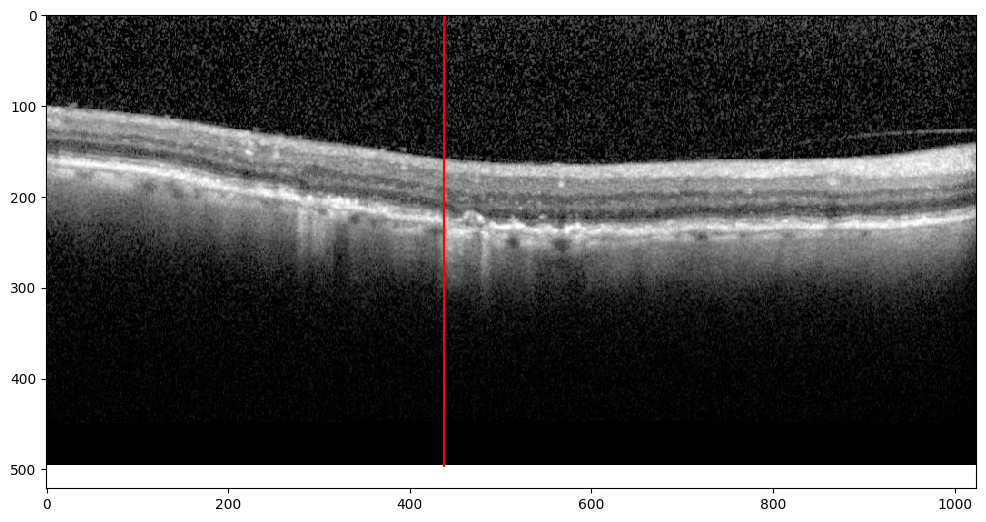

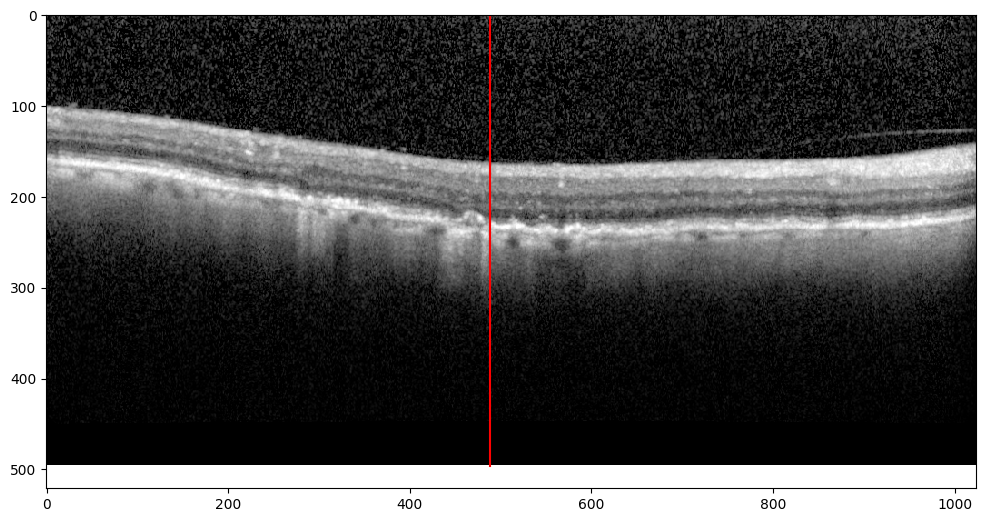

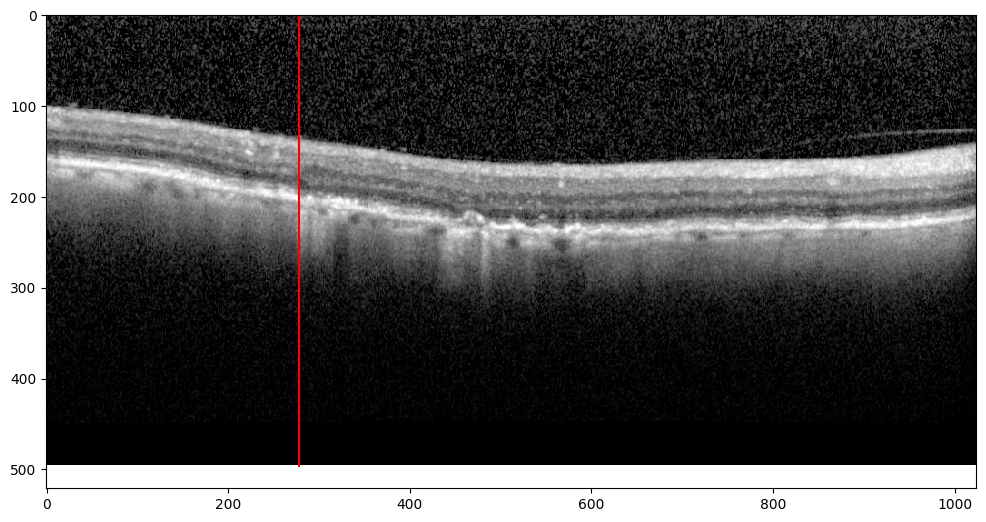

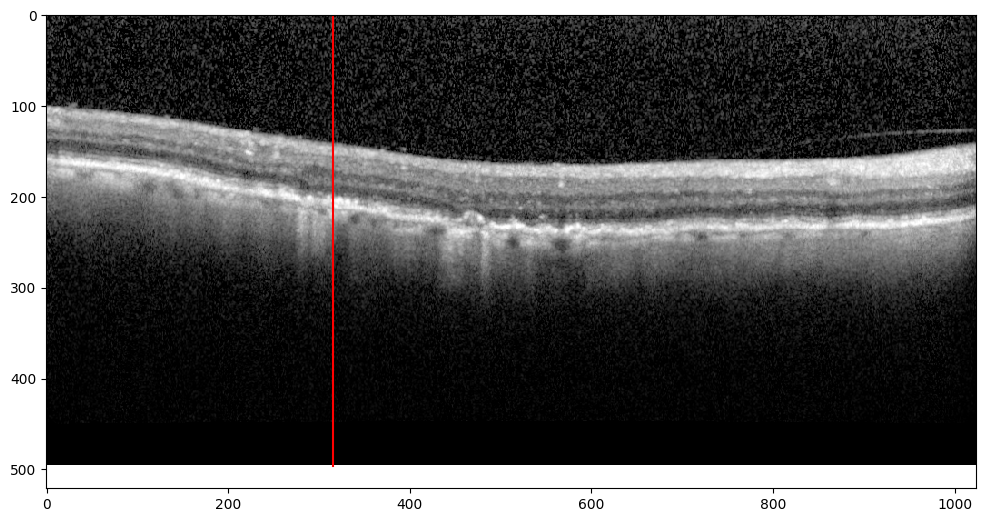

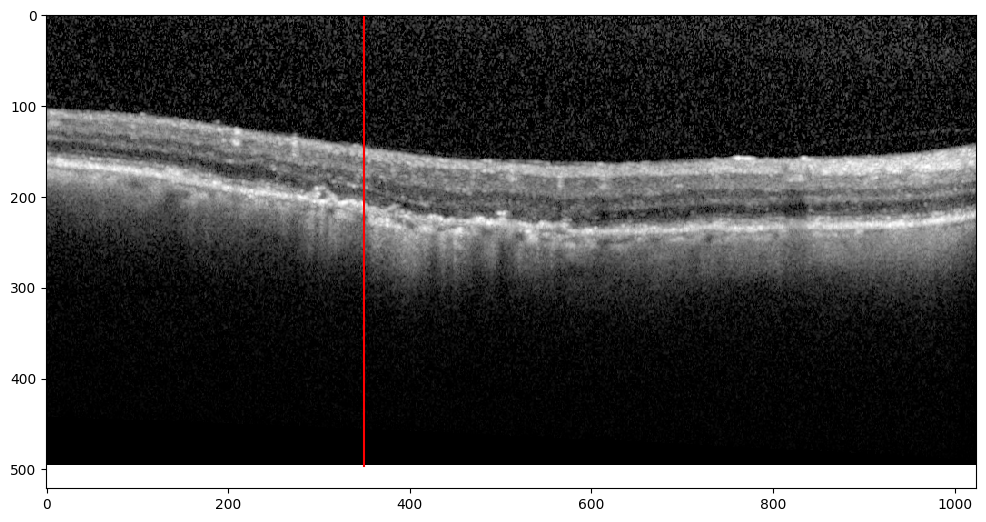

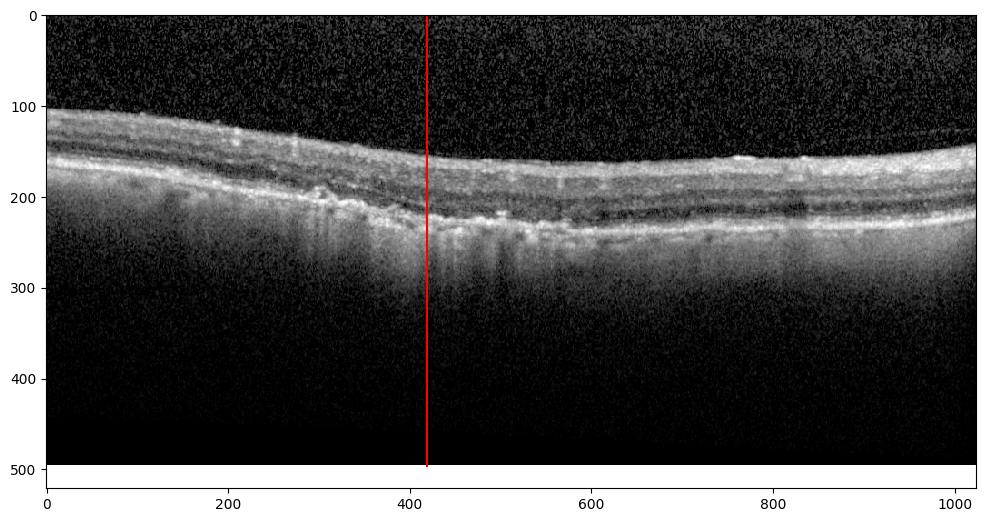

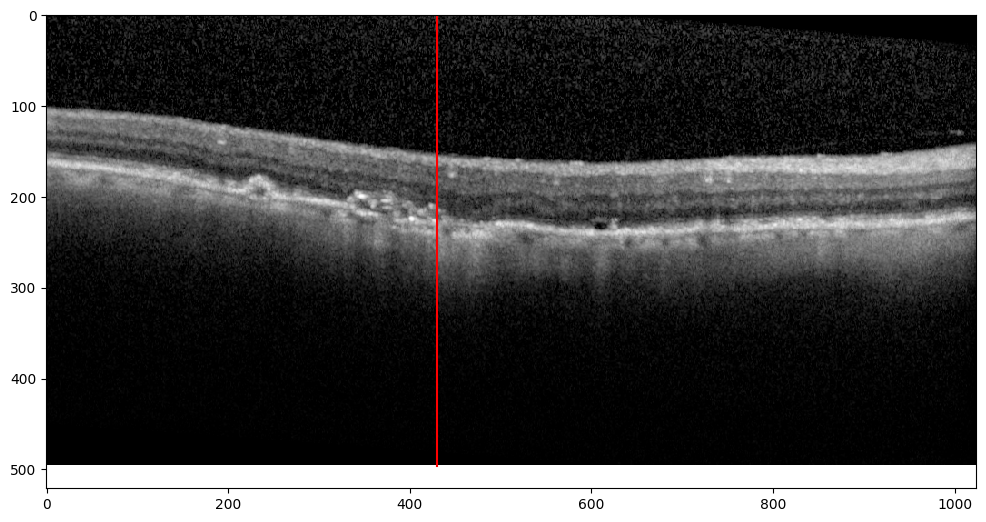

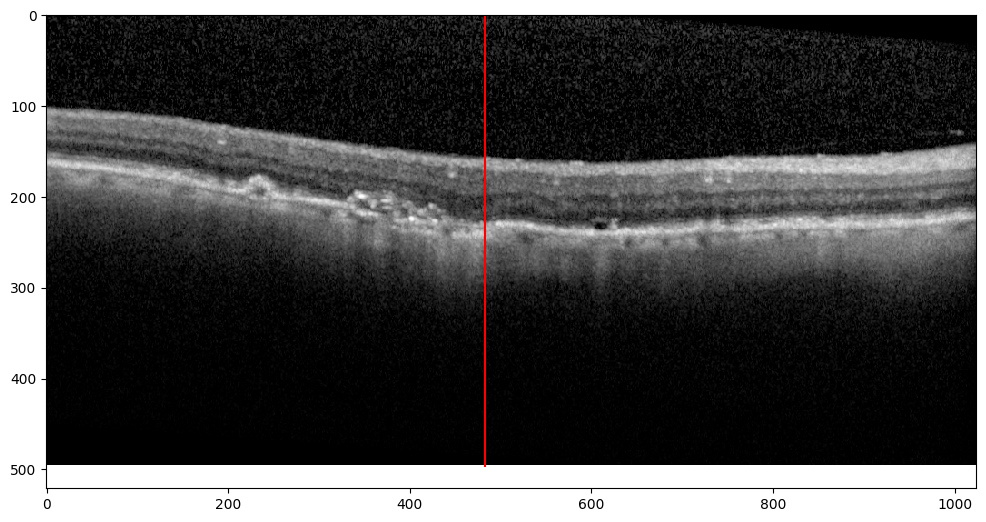

In [8]:
# volume to display
lines_file = 'output/1069748_OD Volume (187395)_lines.csv'

# read the lines file
lines_df = pd.read_csv(lines_file)

# for each line in the lines file, get the image filepath and the line index
for index, row in lines_df.iterrows():
    filepath = row['filepath']
    line_index = row['line_index']
    
    # load the image
    image = Image.open(filepath)
    
    # get the line coordinates
    x = row['x']
    
    # display the image
    plt.imshow(image)
    # draw the line
    plt.plot([x, x], [0, image.height], color='red')
    plt.show()
